<img src="https://drive.google.com/uc?export=view&id=1AH7OKu1s0FsJA3Dj3R9Z37I4gi0eb2Jq" width="100%">

# **Entrega 2**
---

## **0. Equipo de trabajo**
---

### **0.1. Integrantes del equipo de trabajo**


<table><thead>

  <tr>
    <td>1</td>
    <td>Cristhian Enrique Córdoba Trillos</td>
    <td>1030649666</td>
  </tr>
</tbody>
</table>

## **1. Análisis exploratorio de los datos**
---

A continuación se carga el data set de Kaggle para la detección del fraude transaccional.

Para la carga del conjunto de datos utilizaremos los siguientes fragmentos de código en Python:

**1° * Importar las bibliotecas necesarias:**

In [24]:
%pip install kagglehub

**2° * Usar la librería recien instalada para obtener el dataset de Kaggle Hub y crear un dataframe:**

In [25]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


train_file_path = "fraudTrain.csv"
test_file_path = "fraudTest.csv"

try:
    # Load the training dataset
    df_train = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "kartik2112/fraud-detection",
        train_file_path
    )

    # Load the test dataset
    df_test = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "kartik2112/fraud-detection",
        test_file_path
    )
except Exception as e:
    print(f"Error loading datasets: {e}")

/tmp/ipython-input-25-3322668239.py:13: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_train = kagglehub.load_dataset(
/tmp/ipython-input-25-3322668239.py:20: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_test = kagglehub.load_dataset(


**3° * Imprimir en pantalla las primeras filas del dataframe:**

In [26]:
pd.set_option('display.max_columns', None)
df=pd.concat([df_train, df_test])
print("Primeros registros del dataset:")
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

Primeros registros del dataset:


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**4° * Imprimir en pantalla la información resumen del conjunto de datos:**

In [27]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64

**5° Validar valores nulos**

In [28]:
df.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0
city,0


* No se observan valores nulos para el conjunto de datos.

**6° Validar valores duplicados**

In [29]:
df.duplicated().sum()

np.int64(0)

* No se observan valores duplicados en el conjunto de datos.

**7° Aseguramos el tipo correcto de datatype para la fecha, y creamos variables complementarias. También creamos característica de edad**

In [30]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df.drop(columns=['trans_date_trans_time'], inplace=True)
df['dob'] = pd.to_datetime(df['dob'])
df['year_dob'] = df['dob'].dt.year
df['age'] = df['year'] - df['year_dob']

**8° Distribución de la variable objetivo**

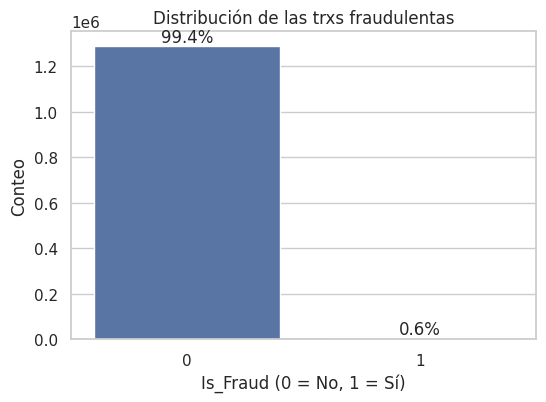

In [31]:
# Distribución de la variable objetivo 'fraude'
counts = df['is_fraud'].value_counts()
plt.figure(figsize=(6, 4))
ax=sns.countplot(x='is_fraud', data=df_train)
plt.title('Distribución de las trxs fraudulentas')
plt.xlabel('Is_Fraud (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
#
total = len(df_train)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
#
plt.show()

* Se observa un desbalance muy alto entre la clase '1' respecto de la '0'. Esto es común entre los conjuntos de datos de transacciónes fraudulentas dada la naturaleza atípica del evento.

**9° Exploración de la variable objetivo vs. explicativas categóricas**

In [32]:
def contar_categorias(df, categorical_columns=None):
    if categorical_columns is None:
        categorical_columns = []
        for col in df.columns:
            if df[col].dtype == 'object' or df[col].nunique() < 50:
                categorical_columns.append(col)

    category_counts = {}
    for col in categorical_columns:
        if col in df.columns:
            category_counts[col] = df[col].nunique()

    return category_counts

In [33]:
contar_categorias(df)

{'merchant': 693,
 'category': 14,
 'first': 355,
 'last': 486,
 'gender': 2,
 'street': 999,
 'city': 906,
 'state': 51,
 'job': 497,
 'trans_num': 1852394,
 'is_fraud': 2,
 'day': 31,
 'month': 12,
 'year': 2,
 'hour': 24}

/tmp/ipython-input-34-2025387872.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index, y=temp.values, palette="viridis")
/tmp/ipython-input-34-2025387872.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index, y=temp.values, palette="viridis")
/tmp/ipython-input-34-2025387872.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index, y=temp.values, palette="viridis")
/tmp/ipython-input-34-2025387872.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assi

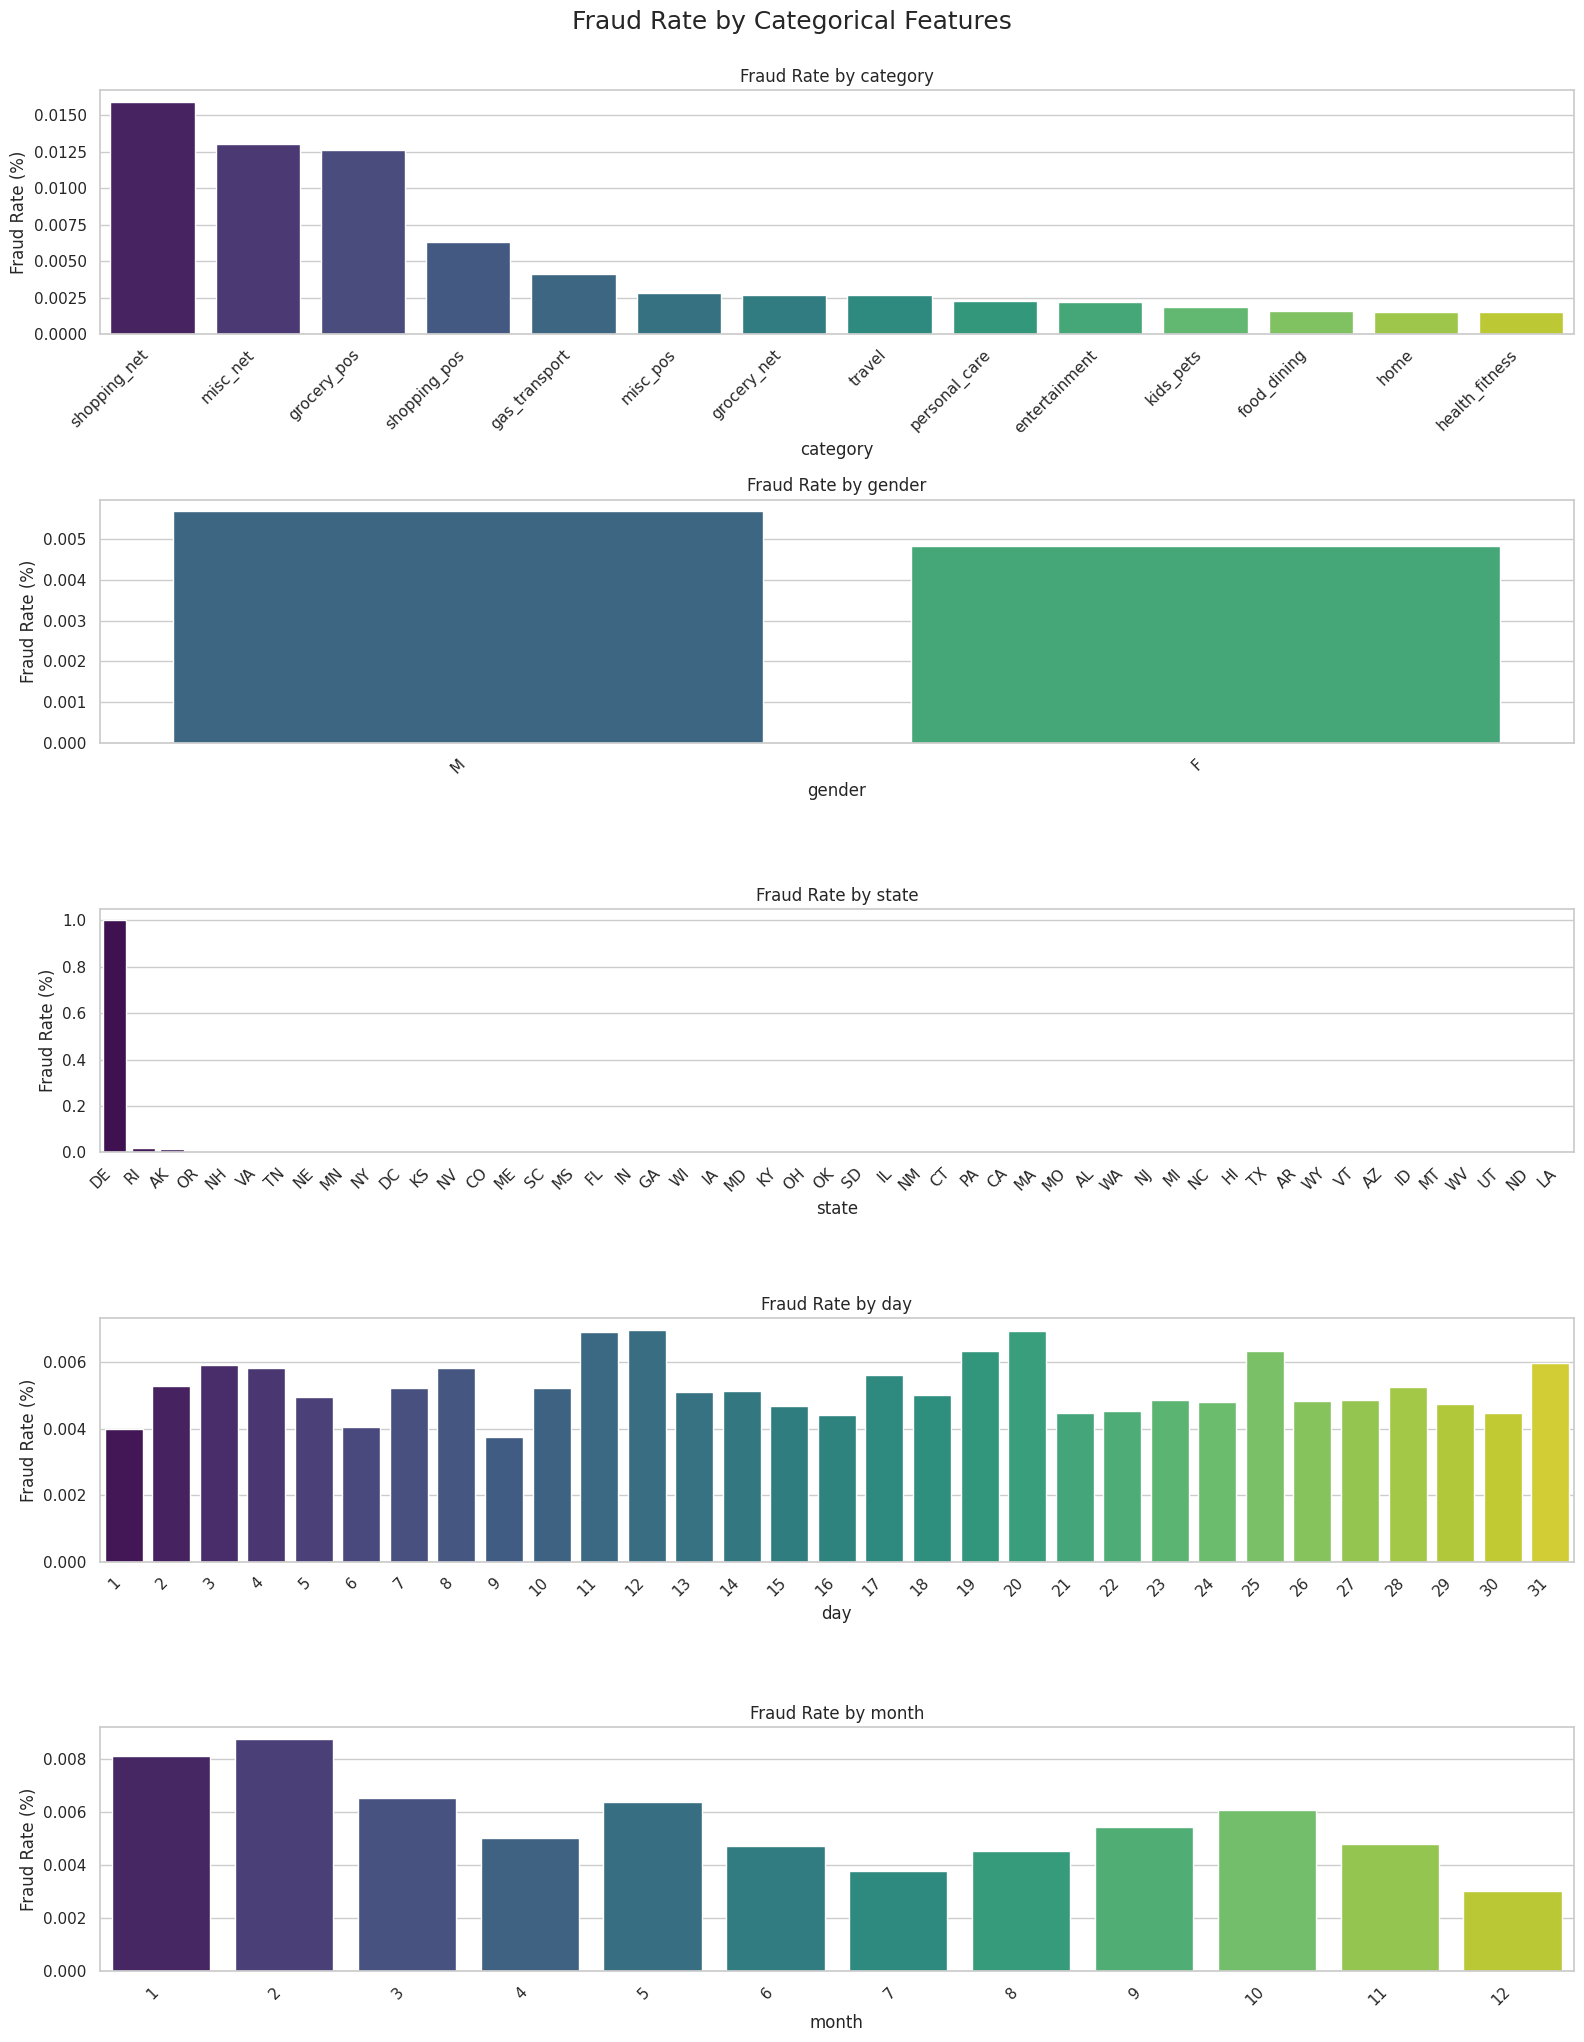

In [34]:
categorical_cols = ['category', 'gender', 'state', 'day', 'month']
# Plot de las variables categóricas
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    temp = df.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    sns.barplot(x=temp.index, y=temp.values, palette="viridis")
    plt.ylabel('Fraud Rate (%)')
    plt.title(f'Fraud Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Fraud Rate by Categorical Features", fontsize=18, y=1.02)
plt.show()

* Se observa que el fraude en las variables categóricas muestra algunos conclusiones primerizas como: la categoría de mayor fraude es 'shopping_net', que el fraude es mayor en 'H' hombres respecto de 'M' mujeres, que en el estado de 'DE' hay un alto fraude, que en los días 12, 20, 25 y 31 del mes es donde ás se presenta fraude y, por último, en el mes de febrero es el mes de mayor fraude del año.

In [35]:
#Mirar fraude por trabajo
fraud_por_trabajos = (
    df.groupby('job')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='tasa_fraude_%')
    .sort_values(by='tasa_fraude_%', ascending=False)
)

# Top 10 trabajos con mayor tasa de fraude
top_trabajos_fraude = fraud_por_trabajos.head(10)
print("🔝 Top 10 Trabajos con Mayor Tasa de Fraude:\n")
print(top_trabajos_fraude.to_string(index=False))

# Bottom 10 trabajos con menor tasa de fraude
bottom_trabajos_fraude = fraud_por_trabajos.tail(10)
print("\n🔻 Bottom 10 Trabajos con Menor Tasa de Fraude:\n")
print(bottom_trabajos_fraude.to_string(index=False))

🔝 Top 10 Trabajos con Mayor Tasa de Fraude:

                              job  tasa_fraude_%
           Air traffic controller          100.0
                  Careers adviser          100.0
             Broadcast journalist          100.0
   Armed forces technical officer          100.0
       Contracting civil engineer          100.0
Sales promotion account executive          100.0
                      Ship broker          100.0
                Software engineer          100.0
                        Solicitor          100.0
                           Dancer          100.0

🔻 Bottom 10 Trabajos con Menor Tasa de Fraude:

                         job  tasa_fraude_%
 Corporate investment banker       0.137127
Medical sales representative       0.136818
         Designer, furniture       0.114364
Designer, exhibition/display       0.091366
                Statistician       0.082305
            Health physicist       0.068587
                  Contractor       0.045809
    Engineer, c

* Se ven profesiones con tasa de frade absoluta, y profesiones con

/tmp/ipython-input-36-1926140374.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(top_ciudades['city'], rotation=45, ha='right')
/tmp/ipython-input-36-1926140374.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(bottom_ciudades['city'], rotation=45, ha='right')
/tmp/ipython-input-36-1926140374.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(top_estados['state'], rotation=45, ha='right')
/tmp/ipython-input-36-1926140374.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(bottom_estados['state'], rotation=45, ha='right')
/usr/local/lib/pyt

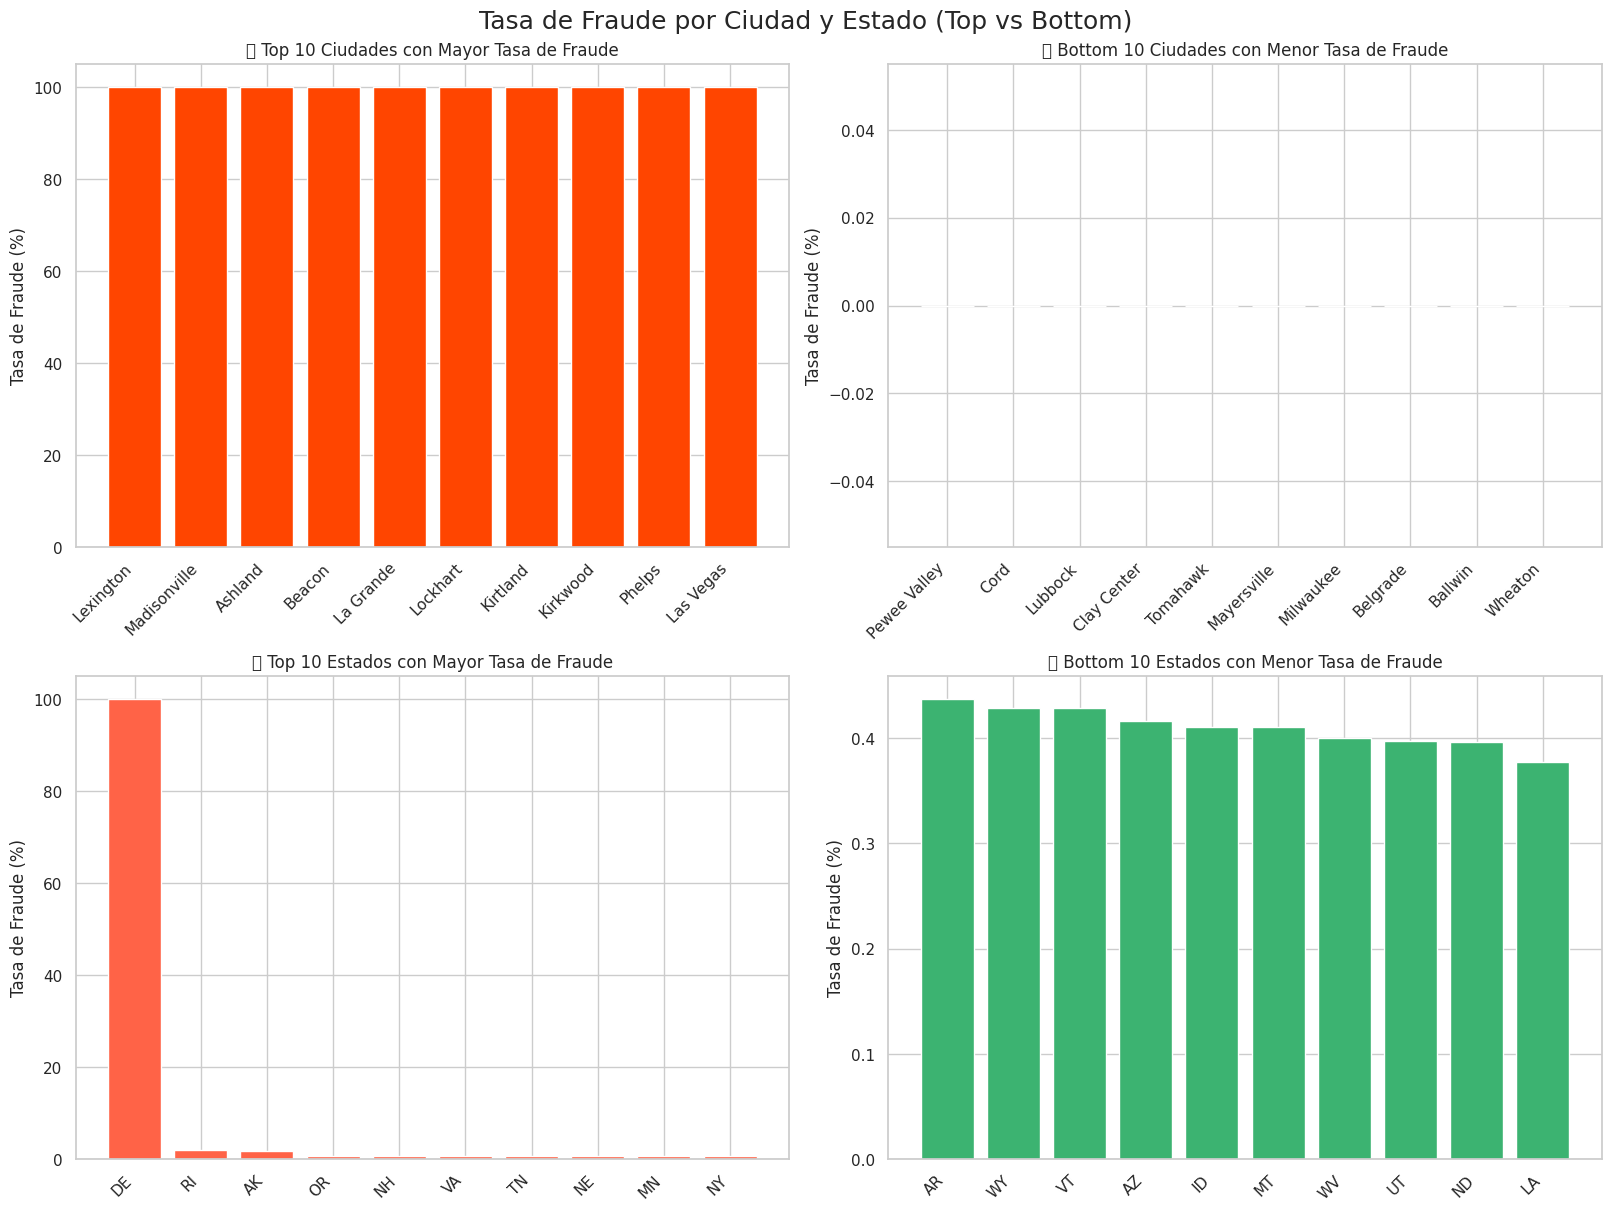

In [36]:
# -------------------- Tasa de Fraude por Ciudad --------------------
ciudad_agrupada = (
    df.groupby('city')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='tasa_fraude')
    .sort_values(by='tasa_fraude', ascending=False)
)

top_ciudades = ciudad_agrupada.head(10)
bottom_ciudades = ciudad_agrupada.tail(10)

# -------------------- Tasa de Fraude por Estado --------------------
estado_agrupado = (
    df.groupby('state')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='tasa_fraude')
    .sort_values(by='tasa_fraude', ascending=False)
)

top_estados = estado_agrupado.head(10)
bottom_estados = estado_agrupado.tail(10)

# -------------------- Gráficos --------------------
fig, axes = plt.subplots(2, 2, figsize=(16, 12), constrained_layout=True)

# Top 10 Ciudades
axes[0, 0].bar(top_ciudades['city'], top_ciudades['tasa_fraude'], color='orangered')
axes[0, 0].set_title('🔝 Top 10 Ciudades con Mayor Tasa de Fraude')
axes[0, 0].set_ylabel('Tasa de Fraude (%)')
axes[0, 0].set_xticklabels(top_ciudades['city'], rotation=45, ha='right')

# Bottom 10 Ciudades
axes[0, 1].bar(bottom_ciudades['city'], bottom_ciudades['tasa_fraude'], color='limegreen')
axes[0, 1].set_title('🔻 Bottom 10 Ciudades con Menor Tasa de Fraude')
axes[0, 1].set_ylabel('Tasa de Fraude (%)')
axes[0, 1].set_xticklabels(bottom_ciudades['city'], rotation=45, ha='right')

# Top 10 Estados
axes[1, 0].bar(top_estados['state'], top_estados['tasa_fraude'], color='tomato')
axes[1, 0].set_title('🔝 Top 10 Estados con Mayor Tasa de Fraude')
axes[1, 0].set_ylabel('Tasa de Fraude (%)')
axes[1, 0].set_xticklabels(top_estados['state'], rotation=45, ha='right')

# Bottom 10 Estados
axes[1, 1].bar(bottom_estados['state'], bottom_estados['tasa_fraude'], color='mediumseagreen')
axes[1, 1].set_title('🔻 Bottom 10 Estados con Menor Tasa de Fraude')
axes[1, 1].set_ylabel('Tasa de Fraude (%)')
axes[1, 1].set_xticklabels(bottom_estados['state'], rotation=45, ha='right')

plt.suptitle('Tasa de Fraude por Ciudad y Estado (Top vs Bottom)', fontsize=18)
plt.show()

/tmp/ipython-input-37-778999075.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('grupo_edad')['is_fraud']


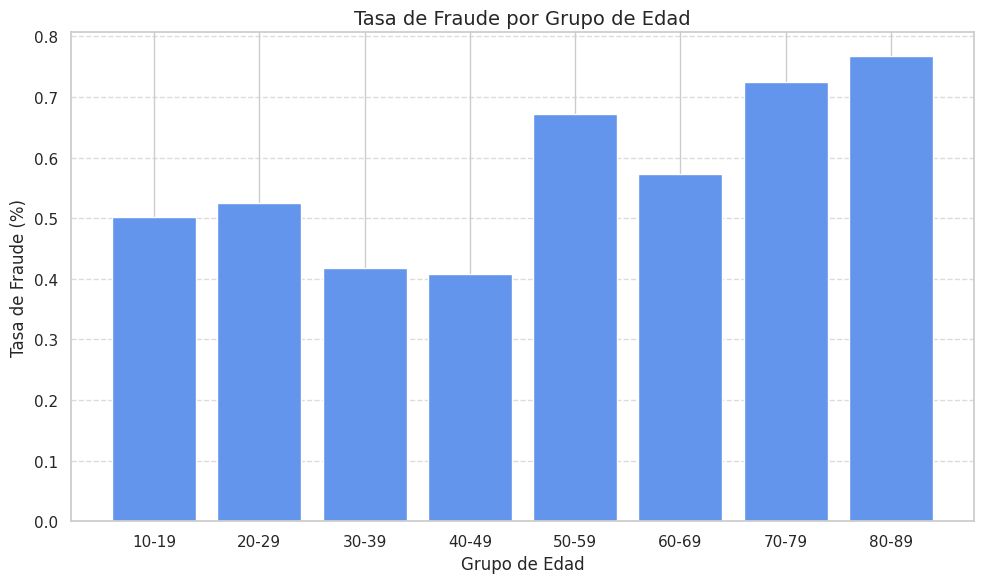

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Definir rangos de edad y etiquetas
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

# 2. Crear nueva columna de grupo de edad
df['grupo_edad'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# 3. Agrupar por grupo de edad y calcular tasa de fraude
grupo_edad = (
    df.groupby('grupo_edad')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='tasa_fraude_%')
)

# 4. Grafica histograma
plt.figure(figsize=(10, 6))
plt.bar(grupo_edad['grupo_edad'], grupo_edad['tasa_fraude_%'], color='cornflowerblue')
plt.title('Tasa de Fraude por Grupo de Edad', fontsize=14)
plt.xlabel('Grupo de Edad')
plt.ylabel('Tasa de Fraude (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

* La mayor tasa de fraude se presenta en la población del rango de edad más alto, es decir, el rango de 80 - 89 años.

**10° Exploración de la variable objetivo vs. explicativas continuas**

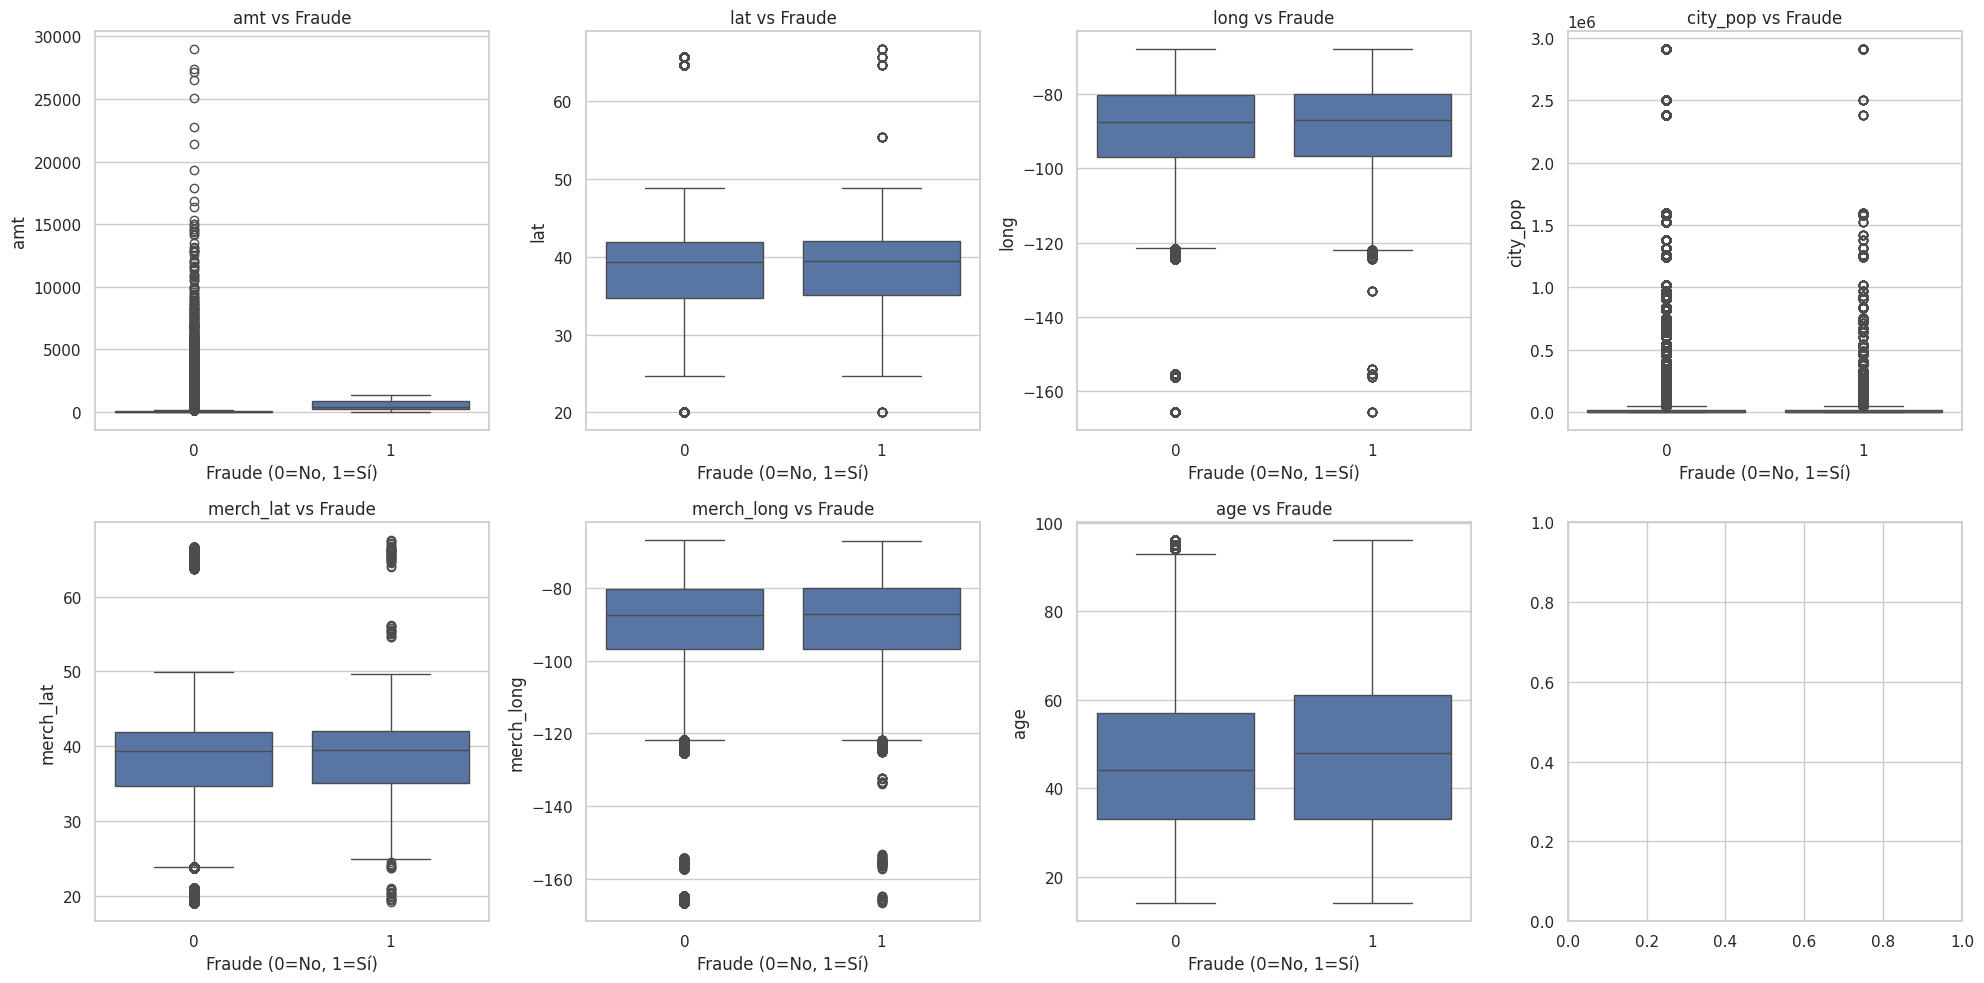

In [38]:
continuas_vars = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long', 'age']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, var in enumerate(continuas_vars):
    if i < len(axes):
        sns.boxplot(data=df, x='is_fraud', y=var, ax=axes[i])
        axes[i].set_title(f'{var} vs Fraude')
        axes[i].set_xlabel('Fraude (0=No, 1=Sí)')

plt.tight_layout()
plt.show()

* Se observa cambios en la distribución del fraude en las variables de fraude respecto del monto y de la edad.

In [39]:
# Identificar valores extremos en transacciones fraudulentas
for var in ['amt', 'age']:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_fraud = df[(df['is_fraud'] == 1) & ((df[var] < lower_bound) | (df[var] > upper_bound))]
    print(f"Outliers de {var} en transacciones fraudulentas: {len(outliers_fraud)}")

Outliers de amt en transacciones fraudulentas: 7318
Outliers de age en transacciones fraudulentas: 42


**11° análisis bivariado**

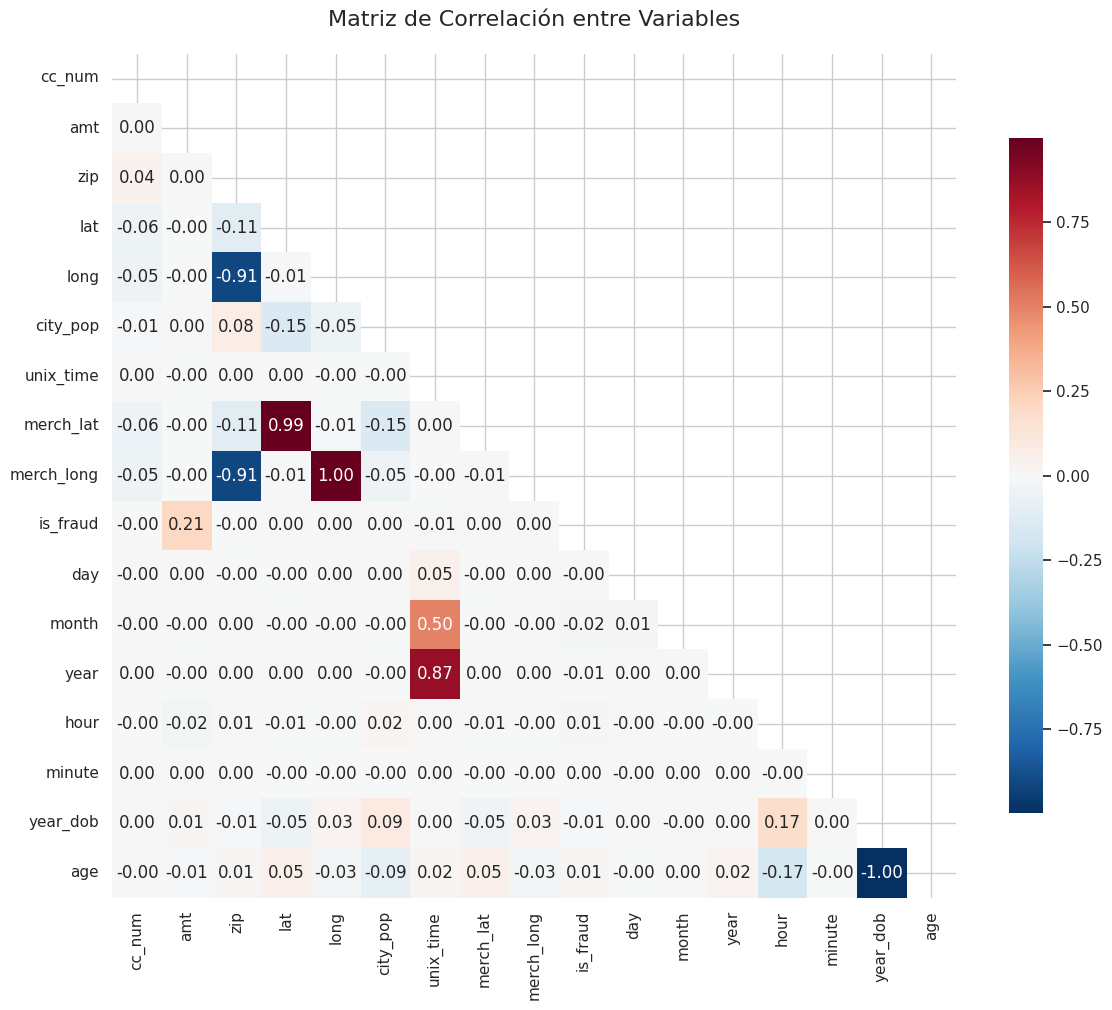

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular matriz de correlación
ans = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(ans, dtype=bool))
# Crear figura
plt.figure(figsize=(12, 10))
# Crear heatmap con colores rojo y azul
sns.heatmap(ans,
            mask=mask,
            annot=True,
            cmap='RdBu_r',  # Rojo y azul invertidos (rojo para correlaciones positivas, azul para negativas)
            center=0,       # Centrar en 0 para mejor interpretación
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})

plt.title('Matriz de Correlación entre Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

* Correlación perfecta (1.0) entre merch_lat y merch_long, indicando que estas variables geográficas están completamente relacionadas. Es lógico pues se refiere a un punto del espacio geogrpafico.
* Correlación positiva moderada (0.87) entre year y is_fraud, sugiriendo que el año de la transacción influye en la probabilidad de fraude.
* Se muestra también que hay una correlación positiva leve (0.22) entre la variable 'is_fraud' y 'amt', lo que sugiere que las transacciones fraudelentas siguen un patrón de realizar transacciones de alto monto, lo cual es lógico pues en una estafa se va a priorizar siempre obtener el mayor beneficio posible de la estafa.
* También se observa que no hay relación (lineal) entre la estafa 'is_fraud' y la ubicación del comerciante 'latitud/longitud'. Se muestra que no es un factor determinante en las estafas.

In [43]:
!rm -rf /content/drive/*

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import os
os.makedirs('/content/drive/MyDrive/MLDS_6/fraud_data', exist_ok=True)

In [52]:
df_1 = df.sample(frac=0.1, random_state=42)
df_1.to_csv('/content/drive/MyDrive/fraud_data.csv', index=False)